# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
#raw output of the data file
df_raw = pd.read_csv('kc_house_data.csv')

In [3]:
# create clean dataframe
df_clean = pd.DataFrame()

In [4]:
#split up the data field analysis

df_raw.columns
jon_columns = df_raw.columns[1:11]
ryan_columns = df_raw.columns[11:]

print("jon to do: \n" + ", ".join(jon_columns))
print('\n')
print("ryan to do: \n" + ", ".join(ryan_columns))

jon to do: 
date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition


ryan to do: 
grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15


In [5]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: Date

# needs to cast astype datetime64
# minimum is 5/2/2014
# maximum is 5/27/2015
# add columns calculated from date: month, day, dayofweek


orig_field = 'date'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean['date'] = df_raw['date'].astype('datetime64')
print('converted date to datetime64')

df_clean['month'] = df_clean.date.map(lambda x: x.month)
print('added field: month')

df_clean['dayofweek'] = df_clean.date.map(lambda x: x.dayofweek)
print('added field: dayofweek')

df_clean['day'] = df_clean.date.map(lambda x: x.day)
print('added field: day')



0 missing values in date
0% missing values in date
372 unique count
21225 non-unique count


converted date to datetime64
added field: month
added field: dayofweek
added field: day


In [6]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: id



orig_field = 'id'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()


0 missing values in id
0% missing values in id
21420 unique count
177 non-unique count




month     dayofweek           day            id
count  21597.000000  21597.000000  21597.000000  2.159700e+04
mean       6.573969      2.010835     15.687457  4.580474e+09
std        3.115061      1.460784      8.634890  2.876736e+09
min        1.000000      0.000000      1.000000  1.000102e+06
25%        4.000000      1.000000      8.000000  2.123049e+09
50%        6.000000      2.000000     16.000000  3.904930e+09
75%        9.000000      3.000000     23.000000  7.308900e+09
max       12.000000      6.000000     31.000000  9.900000e+09

In [7]:
# Duplicate records by ID
# appear to be the same house sold on different dates, confirm in next cell
df_raw[pd.DataFrame.duplicated(df_raw, ['id'], keep=False)].sort_values('id')

id        date      price  bedrooms  bathrooms  sqft_living  \
2495      1000102   4/22/2015   300000.0         6       3.00         2400   
2494      1000102   9/16/2014   280000.0         6       3.00         2400   
16800     7200179  10/16/2014   150000.0         2       1.00          840   
16801     7200179   4/24/2015   175000.0         2       1.00          840   
11422   109200390  10/20/2014   250000.0         3       1.75         1480   
11421   109200390   8/20/2014   245000.0         3       1.75         1480   
12406   123039336   12/8/2014   244900.0         1       1.00          620   
12405   123039336   6/11/2014   148000.0         1       1.00          620   
7786    251300110   1/14/2015   358000.0         3       2.25         2510   
7785    251300110   7/31/2014   225000.0         3       2.25         2510   
9225    302000375   8/14/2014   169100.0         3       2.00         1050   
9226    302000375    5/6/2015   250000.0         3       2.00         1050   
14842   324000530   3/23/2015   459000.0         3       1.00         1320   
14841   324000530    7/8/2014   201500.0         3       1.00         1320   
7171    526059224   9/23/2014   260000.0         4       1.75         1650   
7172    526059224    2/6/2015   470000.0         4       1.75         1650   
17367   641900050   8/19/2014   335000.0         4       2.25         2160   
17368   641900050    2/6/2015   499950.0         4       2.25         2160   
19536   643300040   11/4/2014   481000.0         4       1.75         1920   
19537   643300040   3/13/2015   719521.0         4       1.75         1920   
15286   705730280   4/21/2015   335000.0         3       2.50         1740   
15285   705730280   8/19/2014   325000.0         3       2.50         1740   
9266    722039087   9/23/2014   220500.0         2       1.00          990   
9267    722039087    5/4/2015   329000.0         2       1.00          990   
3781    723049156   5/23/2014   149000.0         3       1.00         1700   
3782    723049156  11/12/2014   284700.0         3       1.00         1700   
823     726049190   10/2/2014   287500.0         3       1.00         1810   
824     726049190   2/18/2015   431000.0         3       1.00         1810   
17588   795000620   9/24/2014   115000.0         3       1.00         1080   
17589   795000620  12/15/2014   124000.0         3       1.00         1080   
...           ...         ...        ...       ...        ...          ...   
717    8820903380   7/28/2014   452000.0         6       2.25         2660   
718    8820903380    1/2/2015   730000.0         6       2.25         2660   
6428   8832900780  10/13/2014   480000.0         5       2.00         1760   
6429   8832900780    4/8/2015   647500.0         5       2.00         1760   
12907  8910500150   5/29/2014   329932.0         3       1.50         1460   
12908  8910500150   1/20/2015   539000.0         3       1.50         1460   
10215  8945100320    5/6/2014   136500.0         3       1.50         1420   
10216  8945100320   10/8/2014   224097.0         3       1.50         1420   
2974   9136103130   12/1/2014   430000.0         2       1.50         1090   
2975   9136103130   5/12/2015   685000.0         2       1.50         1090   
13010  9211500620   10/8/2014   182700.0         3       2.25         1740   
13011  9211500620   4/28/2015   305000.0         3       2.25         1740   
6366   9222400605   4/11/2015   850000.0         5       4.00         2980   
6365   9222400605  11/15/2014   842500.0         5       4.00         2980   
12820  9238500040   2/10/2015   599000.0         3       2.50         2970   
12819  9238500040   6/24/2014   400000.0         3       2.50         2970   
16658  9250900104   4/10/2015   496000.0         5       1.75         2110   
16657  9250900104  11/10/2014   300000.0         5       1.75         2110   
4338   9353300600   6/24/2014   348500.0         3       1.50         1360   
4339   9353300600   3/26/2015   37000

In [8]:
# Duplicate records by ID and Date solde
# confirmed that there is no duplicate record for a single sale
df_raw[pd.DataFrame.duplicated(df_raw, ['id', 'date'], keep=False)].sort_values('id')

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [9]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: price



orig_field = 'price'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()

0 missing values in price
0% missing values in price
3622 unique count
17975 non-unique count




month     dayofweek           day            id         price
count  21597.000000  21597.000000  21597.000000  2.159700e+04  2.159700e+04
mean       6.573969      2.010835     15.687457  4.580474e+09  5.402966e+05
std        3.115061      1.460784      8.634890  2.876736e+09  3.673681e+05
min        1.000000      0.000000      1.000000  1.000102e+06  7.800000e+04
25%        4.000000      1.000000      8.000000  2.123049e+09  3.220000e+05
50%        6.000000      2.000000     16.000000  3.904930e+09  4.500000e+05
75%        9.000000      3.000000     23.000000  7.308900e+09  6.450000e+05
max       12.000000      6.000000     31.000000  9.900000e+09  7.700000e+06

In [10]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: id



orig_field = 'bedrooms'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = np.where(df_raw[orig_field]==33, 4, df_raw[orig_field])
print("replaced incorrect value of 33 with imputed value of 4")

df_clean.describe()

0 missing values in bedrooms
0% missing values in bedrooms
12 unique count
21585 non-unique count


replaced incorrect value of 33 with imputed value of 4


month     dayofweek           day            id         price  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  2.159700e+04   
mean       6.573969      2.010835     15.687457  4.580474e+09  5.402966e+05   
std        3.115061      1.460784      8.634890  2.876736e+09  3.673681e+05   
min        1.000000      0.000000      1.000000  1.000102e+06  7.800000e+04   
25%        4.000000      1.000000      8.000000  2.123049e+09  3.220000e+05   
50%        6.000000      2.000000     16.000000  3.904930e+09  4.500000e+05   
75%        9.000000      3.000000     23.000000  7.308900e+09  6.450000e+05   
max       12.000000      6.000000     31.000000  9.900000e+09  7.700000e+06   

           bedrooms  
count  21597.000000  
mean       3.371857  
std        0.904103  
min        1.000000  
25%        3.000000  
50%        3.000000  
75%        4.000000  
max       11.000000

In [11]:
df_raw[df_raw.bedrooms>df_raw.bedrooms.quantile(.9999)]

id       date     price  bedrooms  bathrooms  sqft_living  \
8748   1773100755  8/21/2014  520000.0        11       3.00         3000   
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
8748       4960     2.0         0.0   0.0     ...          7        2400   
15856      6000     1.0         0.0   0.0     ...          7        1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
8748           600.0     1918        1999.0    98106  47.5560 -122.363   
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
8748            1420        4960  
15856           1330        4700  

[2 rows x 21 columns]

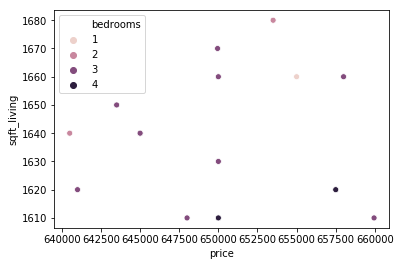

In [12]:
df_subset = df_raw[(df_raw.bedrooms < 10) &
                   (df_raw.price > 640000) &
                   (df_raw.price < 660000) &
                   (df_raw.sqft_living > 1600) &
                   (df_raw.sqft_living < 1700)]

sns.scatterplot(x='price', y='sqft_living', hue='bedrooms', data=df_subset)

In [13]:
df_raw.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: bathroomsNumber


orig_field = 'bathrooms'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()
#df_clean[orig_field].hist()

0 missing values in bathrooms
0% missing values in bathrooms
29 unique count
21568 non-unique count




month     dayofweek           day            id         price  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  2.159700e+04   
mean       6.573969      2.010835     15.687457  4.580474e+09  5.402966e+05   
std        3.115061      1.460784      8.634890  2.876736e+09  3.673681e+05   
min        1.000000      0.000000      1.000000  1.000102e+06  7.800000e+04   
25%        4.000000      1.000000      8.000000  2.123049e+09  3.220000e+05   
50%        6.000000      2.000000     16.000000  3.904930e+09  4.500000e+05   
75%        9.000000      3.000000     23.000000  7.308900e+09  6.450000e+05   
max       12.000000      6.000000     31.000000  9.900000e+09  7.700000e+06   

           bedrooms     bathrooms  
count  21597.000000  21597.000000  
mean       3.371857      2.115826  
std        0.904103      0.768984  
min        1.000000      0.500000  
25%        3.000000      1.750000  
50%        3.000000      2.250000  
75%        4.000000      2.500000  
max       11.000000      8.000000

In [15]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'sqft_living'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()
#df_clean[orig_field].hist()

0 missing values in sqft_living
0% missing values in sqft_living
1034 unique count
20563 non-unique count




month     dayofweek           day            id         price  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  2.159700e+04   
mean       6.573969      2.010835     15.687457  4.580474e+09  5.402966e+05   
std        3.115061      1.460784      8.634890  2.876736e+09  3.673681e+05   
min        1.000000      0.000000      1.000000  1.000102e+06  7.800000e+04   
25%        4.000000      1.000000      8.000000  2.123049e+09  3.220000e+05   
50%        6.000000      2.000000     16.000000  3.904930e+09  4.500000e+05   
75%        9.000000      3.000000     23.000000  7.308900e+09  6.450000e+05   
max       12.000000      6.000000     31.000000  9.900000e+09  7.700000e+06   

           bedrooms     bathrooms   sqft_living  
count  21597.000000  21597.000000  21597.000000  
mean       3.371857      2.115826   2080.321850  
std        0.904103      0.768984    918.106125  
min        1.000000      0.500000    370.000000  
25%        3.000000      1.750000   1430.000000  
50%        3.000000      2.250000   1910.000000  
75%        4.000000      2.500000   2550.000000  
max       11.000000      8.000000  13540.000000

In [16]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'sqft_lot'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()
#df_clean[orig_field].hist()

0 missing values in sqft_lot
0% missing values in sqft_lot
9776 unique count
11821 non-unique count




month     dayofweek           day            id         price  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  2.159700e+04   
mean       6.573969      2.010835     15.687457  4.580474e+09  5.402966e+05   
std        3.115061      1.460784      8.634890  2.876736e+09  3.673681e+05   
min        1.000000      0.000000      1.000000  1.000102e+06  7.800000e+04   
25%        4.000000      1.000000      8.000000  2.123049e+09  3.220000e+05   
50%        6.000000      2.000000     16.000000  3.904930e+09  4.500000e+05   
75%        9.000000      3.000000     23.000000  7.308900e+09  6.450000e+05   
max       12.000000      6.000000     31.000000  9.900000e+09  7.700000e+06   

           bedrooms     bathrooms   sqft_living      sqft_lot  
count  21597.000000  21597.000000  21597.000000  2.159700e+04  
mean       3.371857      2.115826   2080.321850  1.509941e+04  
std        0.904103      0.768984    918.106125  4.141264e+04  
min        1.000000      0.500000    370.000000  5.200000e+02  
25%        3.000000      1.750000   1430.000000  5.040000e+03  
50%        3.000000      2.250000   1910.000000  7.618000e+03  
75%        4.000000      2.500000   2550.000000  1.068500e+04  
max       11.000000      8.000000  13540.000000  1.651359e+06

In [17]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'floors'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()
#df_clean[orig_field].hist()

0 missing values in floors
0% missing values in floors
6 unique count
21591 non-unique count




month     dayofweek           day            id         price  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  2.159700e+04   
mean       6.573969      2.010835     15.687457  4.580474e+09  5.402966e+05   
std        3.115061      1.460784      8.634890  2.876736e+09  3.673681e+05   
min        1.000000      0.000000      1.000000  1.000102e+06  7.800000e+04   
25%        4.000000      1.000000      8.000000  2.123049e+09  3.220000e+05   
50%        6.000000      2.000000     16.000000  3.904930e+09  4.500000e+05   
75%        9.000000      3.000000     23.000000  7.308900e+09  6.450000e+05   
max       12.000000      6.000000     31.000000  9.900000e+09  7.700000e+06   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  
count  21597.000000  21597.000000  21597.000000  2.159700e+04  21597.000000  
mean       3.371857      2.115826   2080.321850  1.509941e+04      1.494096  
std        0.904103      0.768984    918.106125  4.141264e+04      0.539683  
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000  
25%        3.000000      1.750000   1430.000000  5.040000e+03      1.000000  
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000  
75%        4.000000      2.500000   2550.000000  1.068500e+04      2.000000  
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000

In [18]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'waterfront'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = np.where(df_raw[orig_field].isna(), 'missing', df_raw[orig_field].astype(str))
print("replaced mising values with 'missing'")
df_clean.describe()
#df_clean[orig_field].hist()

2376 missing values in waterfront
11% missing values in waterfront
3 unique count
21594 non-unique count


replaced mising values with 'missing'


month     dayofweek           day            id         price  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  2.159700e+04   
mean       6.573969      2.010835     15.687457  4.580474e+09  5.402966e+05   
std        3.115061      1.460784      8.634890  2.876736e+09  3.673681e+05   
min        1.000000      0.000000      1.000000  1.000102e+06  7.800000e+04   
25%        4.000000      1.000000      8.000000  2.123049e+09  3.220000e+05   
50%        6.000000      2.000000     16.000000  3.904930e+09  4.500000e+05   
75%        9.000000      3.000000     23.000000  7.308900e+09  6.450000e+05   
max       12.000000      6.000000     31.000000  9.900000e+09  7.700000e+06   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  
count  21597.000000  21597.000000  21597.000000  2.159700e+04  21597.000000  
mean       3.371857      2.115826   2080.321850  1.509941e+04      1.494096  
std        0.904103      0.768984    918.106125  4.141264e+04      0.539683  
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000  
25%        3.000000      1.750000   1430.000000  5.040000e+03      1.000000  
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000  
75%        4.000000      2.500000   2550.000000  1.068500e+04      2.000000  
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000

63 missing values in view
0% missing values in view
6 unique count
21591 non-unique count


replaced mising values with 0


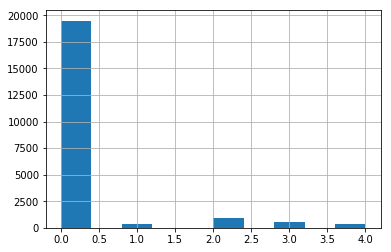

In [19]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'view'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = np.where(df_raw[orig_field].isna(), 0, df_raw[orig_field])
print("replaced mising values with 0")

df_clean.describe()
df_clean[orig_field].hist()

0 missing values in condition
0% missing values in condition
5 unique count
21592 non-unique count




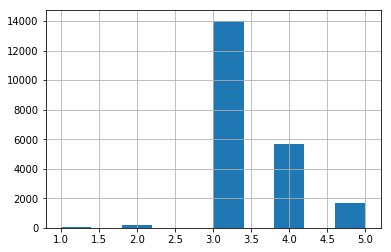

In [20]:
# next line is only for sandbox:
#df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'condition'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]
#df_clean[orig_field] = np.where(df_raw[orig_field].isna(), 0, df_raw[orig_field])
#print("replaced mising values with 0")

df_clean.describe()
df_clean[orig_field].hist()

In [21]:
df_clean['grade'] = df_raw['grade']
df_clean['sqft_above'] = df_raw['sqft_above']
df_clean['sqft_basement'] = df_raw['sqft_basement']
df_clean['yr_built'] = df_raw['yr_built']
df_clean['yr_renovated'] = df_raw['yr_renovated']
df_clean['zipcode'] = df_raw['zipcode']
df_clean['lat'] = df_raw['lat']
df_clean['long'] = df_raw['long']
df_clean['sqft_living15'] = df_raw['sqft_living15']
df_clean['sqft_lot15'] = df_raw['sqft_lot15']

In [22]:
df_clean['sqft_test'] = df_clean['sqft_living'] - df_clean['sqft_above']
df_clean['sqft_basement'] = np.where(df_clean['sqft_basement']=='?', df_clean['sqft_test'], df_clean['sqft_basement'])
df_clean['sqft_basement'] = df_clean['sqft_basement'].astype(float)

In [23]:
def renovated_cat(series):
    if series == 0:
        return 'Never Renovated'
    elif 2000 <= series <= 2015:
        return 'Since 2000 inclusive'
    elif  series < 2000:
        return 'Prior to 2000'
    else:
        return 'missing'

df_clean['yr_renovated_cat'] = df_clean['yr_renovated'].apply(renovated_cat)



In [24]:
df_clean['view'].fillna(value=0, inplace=True)

In [25]:
df_clean['waterfront'].astype(str)
df_clean['waterfront'].fillna('missing', inplace=True)

In [26]:
df_clean.columns
df_clean.pop('sqft_test')

0           0
1         400
2           0
3         910
4           0
5        1530
6           0
7           0
8         730
9           0
10       1700
11        300
12          0
13          0
14          0
15        970
16          0
17          0
18          0
19          0
20        760
21        720
22          0
23          0
24          0
25          0
26        700
27          0
28        730
29          0
         ... 
21567       0
21568     320
21569       0
21570       0
21571       0
21572     190
21573       0
21574    1800
21575       0
21576       0
21577       0
21578       0
21579      50
21580       0
21581       0
21582       0
21583       0
21584       0
21585       0
21586       0
21587       0
21588       0
21589       0
21590     910
21591     130
21592       0
21593       0
21594       0
21595       0
21596       0
Name: sqft_test, Length: 21597, dtype: int64

In [27]:
df_clean['log_price'] = np.log(df_clean['price'])

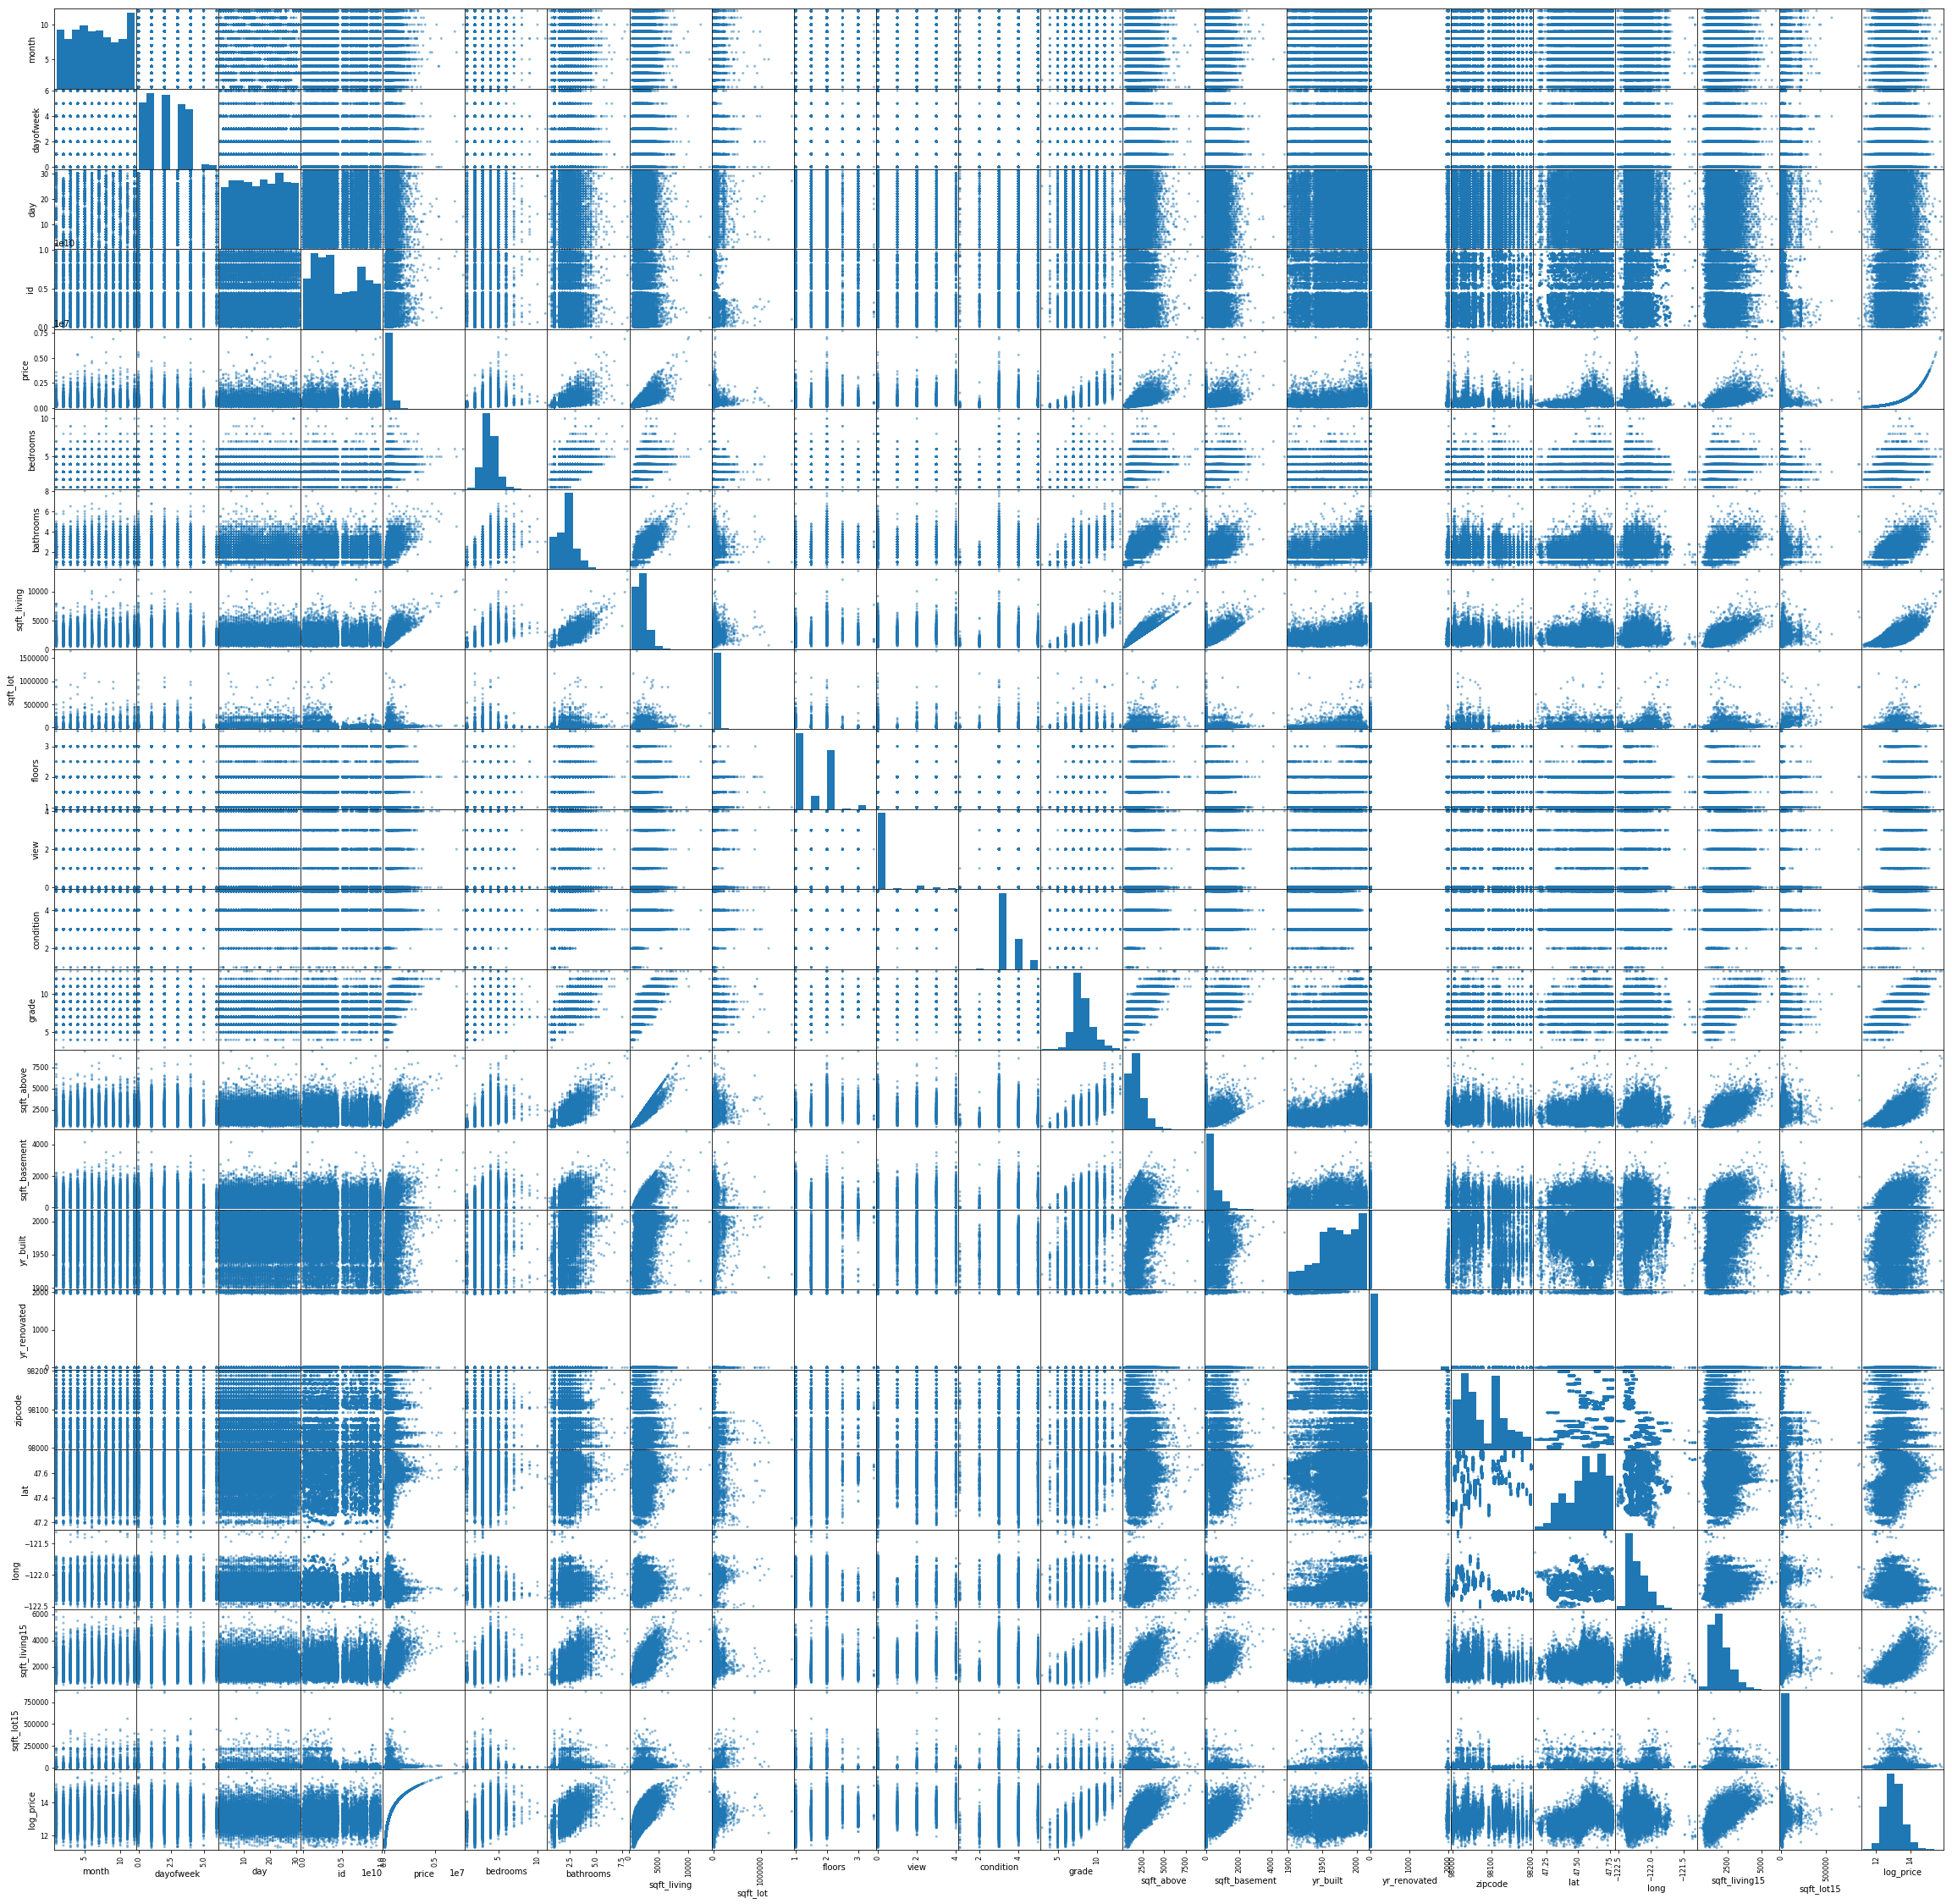

In [28]:
pd.plotting.scatter_matrix(df_clean, figsize=(40,40));

waterfront
0.0        5.326420e+05
1.0        1.717215e+06
missing    5.294301e+05
Name: price, dtype: float64

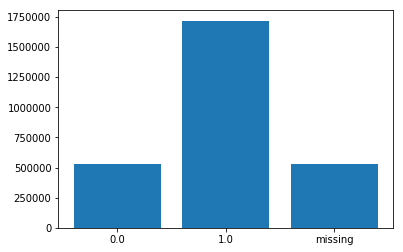

In [29]:
waterfront_grouped = df_clean.groupby('waterfront')['price'].mean()
plt.bar(x=waterfront_grouped.index, height=waterfront_grouped)
waterfront_grouped

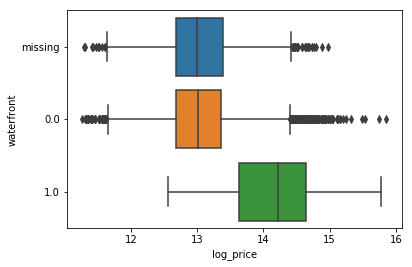

In [30]:
sns.boxplot(x='log_price', y='waterfront', data=df_clean);

yr_renovated_cat
Never Renovated         530677.535536
Prior to 2000           703728.909589
Since 2000 inclusive    831667.430079
missing                 538617.004945
Name: price, dtype: float64

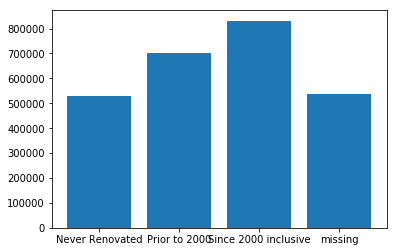

In [31]:
yr_renovated_grouped = df_clean.groupby('yr_renovated_cat')['price'].mean()
plt.bar(x=yr_renovated_grouped.index, height=yr_renovated_grouped)
yr_renovated_grouped

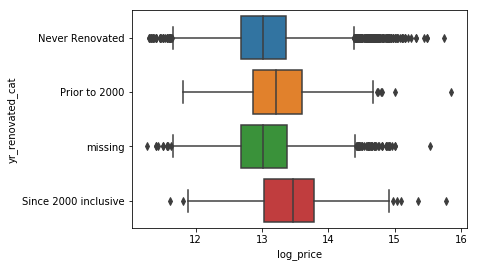

In [32]:
sns.boxplot(x='log_price', y='yr_renovated_cat', data=df_clean);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


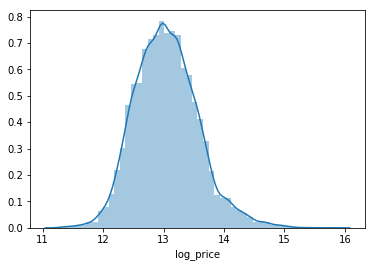

In [33]:
sns.distplot(df_clean.log_price)


In [34]:
latlong = list(zip(df_clean.lat, df_clean.long))
latlong = [list(elem) for elem in latlong]
type(latlong[1])

list

In [35]:
print(df_clean.corr())

                  month  dayofweek       day        id     price  bedrooms  \
month          1.000000  -0.047850 -0.060771 -0.011572 -0.009928 -0.000798   
dayofweek     -0.047850   1.000000  0.006014 -0.000310 -0.001747  0.009922   
day           -0.060771   0.006014  1.000000  0.002143 -0.014684 -0.009502   
id            -0.011572  -0.000310  0.002143  1.000000 -0.016772  0.002303   
price         -0.009928  -0.001747 -0.014684 -0.016772  1.000000  0.315965   
bedrooms      -0.000798   0.009922 -0.009502  0.002303  0.315965  1.000000   
bathrooms      0.007543   0.010466 -0.005169  0.005162  0.525906  0.527846   
sqft_living    0.012112   0.005260 -0.007413 -0.012241  0.701917  0.593152   
sqft_lot      -0.002591  -0.002748  0.000252 -0.131911  0.089876  0.033595   
floors         0.014245   0.002431 -0.006492  0.018608  0.256804  0.183672   
view          -0.005161   0.006858  0.010638  0.011772  0.393497  0.080731   
condition      0.022388   0.007216 -0.004630 -0.023803  0.036056

In [37]:
df_clean.columns

Index(['date', 'month', 'dayofweek', 'day', 'id', 'price', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_renovated_cat', 'log_price'],
      dtype='object')

In [39]:
df_clean2 = df_clean.drop(['month', 'dayofweek','day', 'id', 'price', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'yr_renovated_cat'], axis=1)
abs(df_clean2.corr()) > 0.75

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
bedrooms           True      False        False     False   False       False   
bathrooms         False       True         True     False   False       False   
sqft_living       False       True         True     False   False        True   
sqft_lot          False      False        False      True   False       False   
floors            False      False        False     False    True       False   
sqft_above        False      False         True     False   False        True   
sqft_basement     False      False        False     False   False       False   
sqft_living15     False      False         True     False   False       False   
sqft_lot15        False      False        False     False   False       False   
log_price         False      False        False     False   False       False   

               sqft_basement  sqft_living15  sqft_lot15  log_price  
bedrooms               False          False       False      False  
bathrooms              False          False       False      False  
sqft_living            False           True       False      False  
sqft_lot               False          False       False      False  
floors                 False          False       False      False  
sqft_above             False          False       False      False  
sqft_basement           True          False       False      False  
sqft_living15          False           True       False      False  
sqft_lot15             False          False        True      False  
log_price              False          False       False       True

In [139]:
# map2 = folium.Map(location=[df_clean.lat[1], df_clean.long[1]], zoom_start=11)
# for i in latlong:
#      folium.Marker(i).add_to(map2)
# map2

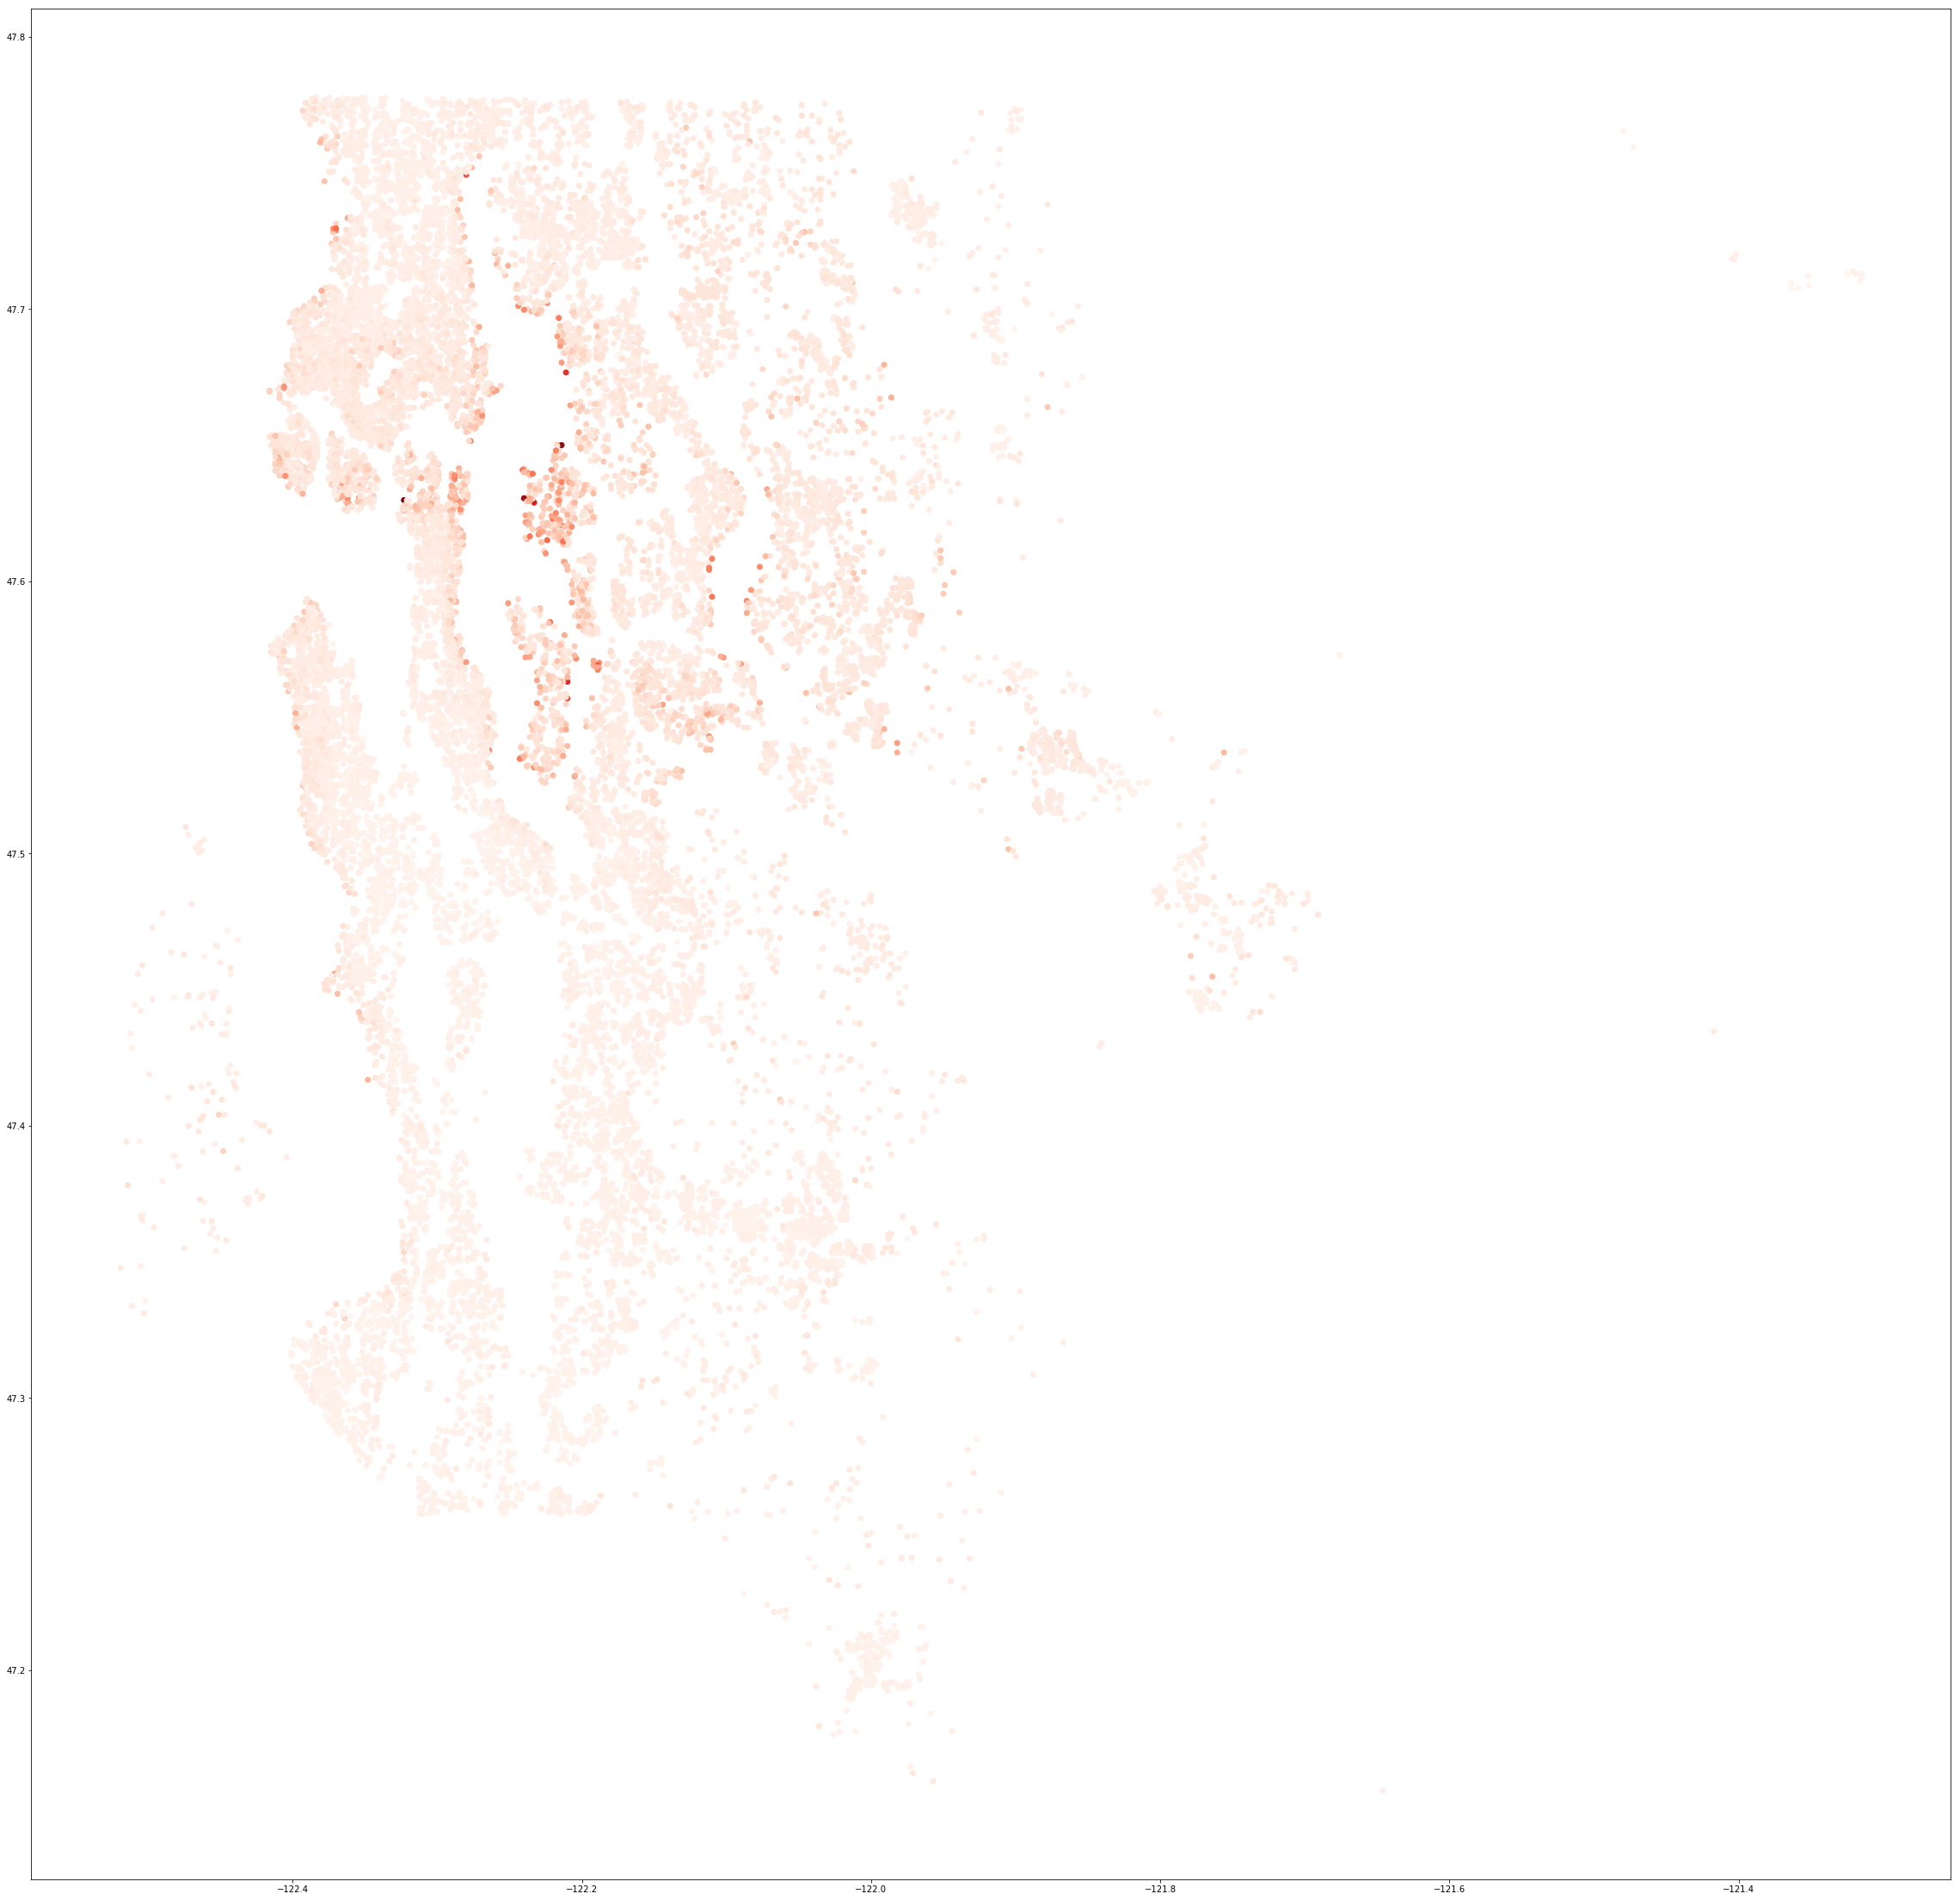

In [86]:
plt.figure(figsize=(40,40))
plt.scatter(df_clean.long, df_clean.lat, alpha=1, c=df_clean.price, cmap='Reds')

In [ ]:
plt.scatter(df_clean)

In [123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
date                21597 non-null datetime64[ns]
month               21597 non-null int64
dayofweek           21597 non-null int64
day                 21597 non-null int64
id                  21597 non-null int64
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null object
view                21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null float64
yr_built            21597 non-null int64
yr_renovated        17755 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long  

Questions:

1. Do waterfront houses have higher selling prices than other houses?
2. Does location influence housing prices (nearest 15)?
3. Does recent renovation have an impact on selling price?


In [137]:
formula = 'log_price ~ bedrooms+bathrooms+sqft_above+sqft_basement+sqft_lot+sqft_living15+sqft_lot15'
model = ols(formula, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     3287.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        16:46:36   Log-Likelihood:                -8957.3
No. Observations:               21597   AIC:                         1.793e+04
Df Residuals:                   21589   BIC:                         1.799e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.1661      0.011   1075.859      0.000      12.144      12.188
bedrooms         -0.0577      0.003    -16.495      0.000      -0.065      -0.051
bathrooms         0.0554      0.005     10.984      0.000       0.045       0.065
sqft_above        0.0003   6.01e-06     47.453      0.000       0.000       0.000
sqft_basement     0.0004   6.99e-06     51.433      0.000       0.000       0.000
sqft_lot       2.409e-07   8.68e-08      2.774      0.006    7.07e-08    4.11e-07
sqft_living15     0.0002   5.73e-06     31.259      0.000       0.000       0.000
sqft_lot15    -1.175e-06   1.33e-07     -8.865      0.000   -1.43e-06   -9.15e-07
==============================================================================
Omnibus:                       25.367   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.469
Skew:                           0.031   Prob(JB):                     1.32e-05
Kurtosis:                       2.855   Cond. No.                     2.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

17822.000000000007


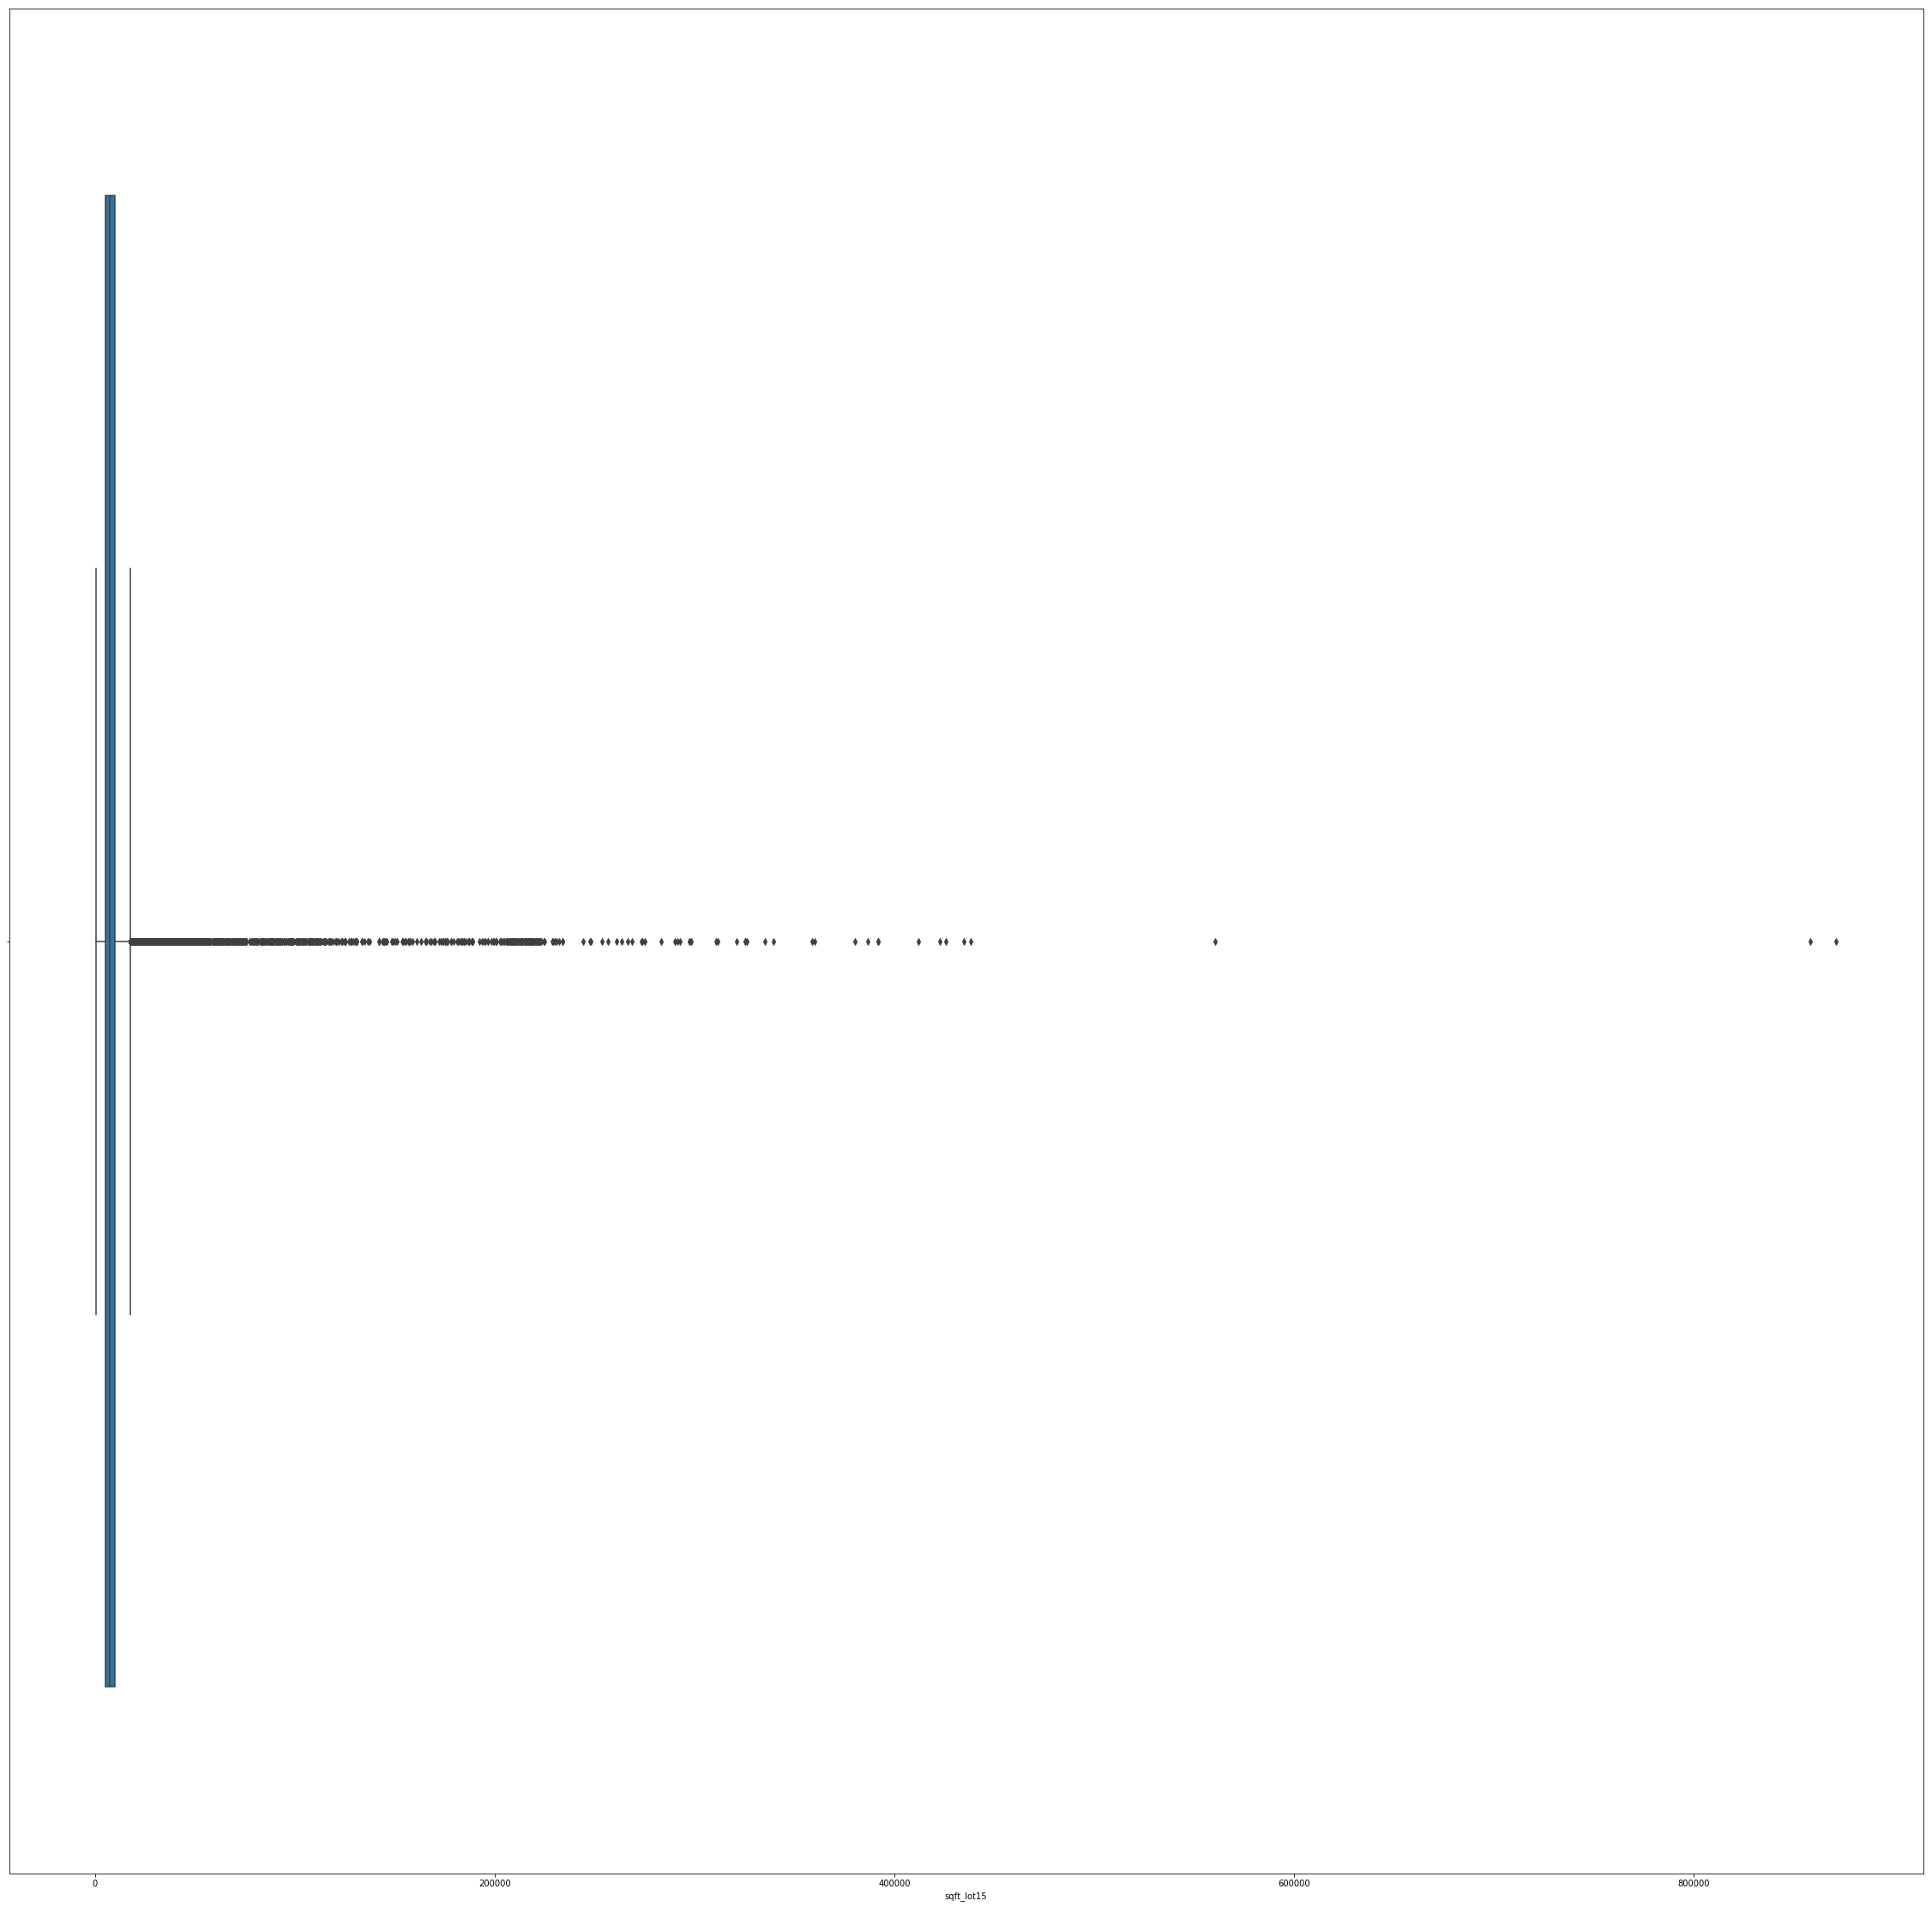

In [66]:
plt.figure(figsize=(40,40))
sns.boxplot(df_clean['sqft_lot15'])
print(df_clean['sqft_lot15'].quantile(.90))
df_clean['sqft_lot15'].describe()
df_test = df_clean

In [71]:
df_test['sqft_lot15'] = np.log(df_test['sqft_lot15'])
df_test['sqft_lot'] = np.log(df_test['sqft_lot'])

21597

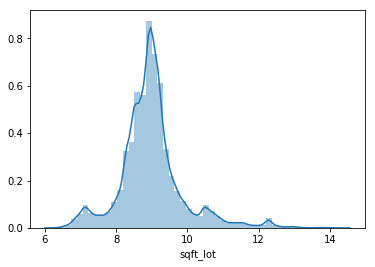

In [72]:
sns.distplot(df_test['sqft_lot'])
len(df_test)

In [91]:
log_list = ['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
df_clean['sqft_basement'] = df_clean['sqft_basement'] + 1
for i in log_list:
    df_clean[i] = df_clean[i].apply(lambda x: np.log(x))
df_clean['sqft_lot']


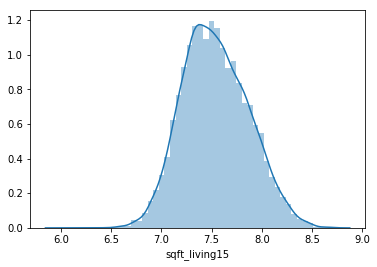

In [93]:
sns.distplot(df_clean['sqft_living15'])

In [89]:
df_clean['sqft_above_s'] = (df_clean['sqft_above'] - df_clean['sqft_above'].mean())/df_clean['sqft_above'].std()
df_clean['sqft_basement_s'] = (df_clean['sqft_basement'] - df_clean['sqft_basement'].mean())/df_clean['sqft_basement'].std()
df_clean['sqft_living15_s'] = (df_clean['sqft_living15'] - df_clean['sqft_living15'].mean())/df_clean['sqft_living15'].std()
df_clean['sqft_lot_s'] = (df_clean['sqft_lot'] - df_clean['sqft_lot'].mean())/df_clean['sqft_lot'].std()
df_clean['sqft_lot15_s'] = (df_clean['sqft_lot15'] - df_clean['sqft_lot15'].mean())/df_clean['sqft_lot15'].std()

In [94]:
df_clean.columns

Index(['date', 'month', 'dayofweek', 'day', 'id', 'price', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_renovated_cat', 'log_price', 'sqft_above_s', 'sqft_basement_s',
       'sqft_living15_s', 'sqft_lot_s', 'sqft_lot15_s'],
      dtype='object')

Check model assumptions
Make note of justifications
Cross-validation
Ridge regression rather than variable selection

In [98]:
df_clean = df_clean.drop(['date', 'month', 'dayofweek', 'day', 'id', 'price', 'sqft_living', 'sqft_lot', 
                          'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [100]:
df_clean.describe()

bedrooms     bathrooms        floors          view     condition  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       3.371857      2.115826      1.494096      0.233181      3.409825   
std        0.904103      0.768984      0.539683      0.764673      0.650546   
min        1.000000      0.500000      1.000000      0.000000      1.000000   
25%        3.000000      1.750000      1.000000      0.000000      3.000000   
50%        3.000000      2.250000      1.500000      0.000000      3.000000   
75%        4.000000      2.500000      2.000000      0.000000      4.000000   
max       11.000000      8.000000      3.500000      4.000000      5.000000   

              grade       zipcode     log_price  sqft_above_s  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean       7.657915  98077.951845     13.048211  2.432117e-13   
std        1.173200     53.513072      0.526555  1.000000e+00   
min        3.000000  98001.000000     11.264464 -3.468754e+00   
25%        7.000000  98033.000000     12.682307 -7.338088e-01   
50%        7.000000  98065.000000     13.017003 -9.998319e-02   
75%        8.000000  98118.000000     13.377006  7.154553e-01   
max       13.000000  98199.000000     15.856731  4.107269e+00   

       sqft_basement_s  sqft_living15_s    sqft_lot_s  sqft_lot15_s  
count     2.159700e+04     2.159700e+04  2.159700e+04  2.159700e+04  
mean     -2.484758e-14     3.883951e-13  4.329434e-13  2.011875e-13  
std       1.000000e+00     1.000000e+00  1.000000e+00  1.000000e+00  
min      -7.982110e-01    -4.734925e+00 -3.659456e+00 -3.907475e+00  
25%      -7.982110e-01    -7.114071e-01 -4.928410e-01 -4.892905e-01  
50%      -7.982110e-01    -6.710000e-02 -9.204258e-03  3.701328e-02  
75%       1.197886e+00     6.929641e-01  3.705172e-01  3.841407e-01  
max       1.876215e+00     3.647456e+00  4.805835e+00  4.441714e+00

In [ ]:
df_clean.zipcode

In [103]:
formula2 = 'log_price ~ bedrooms + bathrooms + sqft_above_s + sqft_basement_s + sqft_lot_s + sqft_living15_s + sqft_lot15_s'
model2 = ols(formula2, data=df_clean).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3283.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        10:53:10   Log-Likelihood:                -8963.9
No. Observations:               21597   AIC:                         1.794e+04
Df Residuals:                   21589   BIC:                         1.801e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.1845      0.015    852.293      0.000      13.154      13.215
bedrooms           -0.0564      0.004    -15.966      0.000      -0.063      -0.049
bathrooms           0.0255      0.005      4.807      0.000       0.015       0.036
sqft_above_s        0.2685      0.005     51.197      0.000       0.258       0.279
sqft_basement_s     0.1673      0.003     53.165      0.000       0.161       0.173
sqft_lot_s         -0.0063      0.006     -0.978      0.328      -0.019       0.006
sqft_living15_s     0.1470      0.004     37.435      0.000       0.139       0.155
sqft_lot15_s       -0.0576      0.006     -8.902      0.000      -0.070      -0.045
==============================================================================
Omnibus:                       53.493   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.926
Skew:                           0.096   Prob(JB):                     8.74e-12
Kurtosis:                       2.858   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
df_clean.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [109]:
df_clean.yr_renovated_cat.value_counts()

Never Renovated         17011
missing                  3842
Since 2000 inclusive      379
Prior to 2000             365
Name: yr_renovated_cat, dtype: int64

In [110]:
df_raw.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [111]:
df_clean.head()

bedrooms  bathrooms  floors waterfront  view  condition  grade  zipcode  \
0         3       1.00     1.0    missing   0.0          3      7    98178   
1         3       2.25     2.0        0.0   0.0          3      7    98125   
2         2       1.00     1.0        0.0   0.0          3      6    98028   
3         4       3.00     1.0        0.0   0.0          5      7    98136   
4         3       2.00     1.0        0.0   0.0          3      8    98074   

  yr_renovated_cat  log_price  sqft_above_s  sqft_basement_s  sqft_living15_s  \
0  Never Renovated  12.309982     -0.753565        -0.798211        -1.035429   
1    Prior to 2000  13.195614      0.672693         1.092003        -0.326781   
2          missing  12.100712     -1.752954        -0.798211         1.126504   
3  Never Renovated  13.311329     -1.026835         1.350776        -0.990187   
4  Never Renovated  13.142166      0.073515        -0.798211        -0.134218   

   sqft_lot_s  sqft_lot15_s  
0   -0.356781     -0.351661  
1   -0.067247      0.040169  
2    0.297257      0.108159  
3   -0.502398     -0.516181  
4    0.057900      0.017375

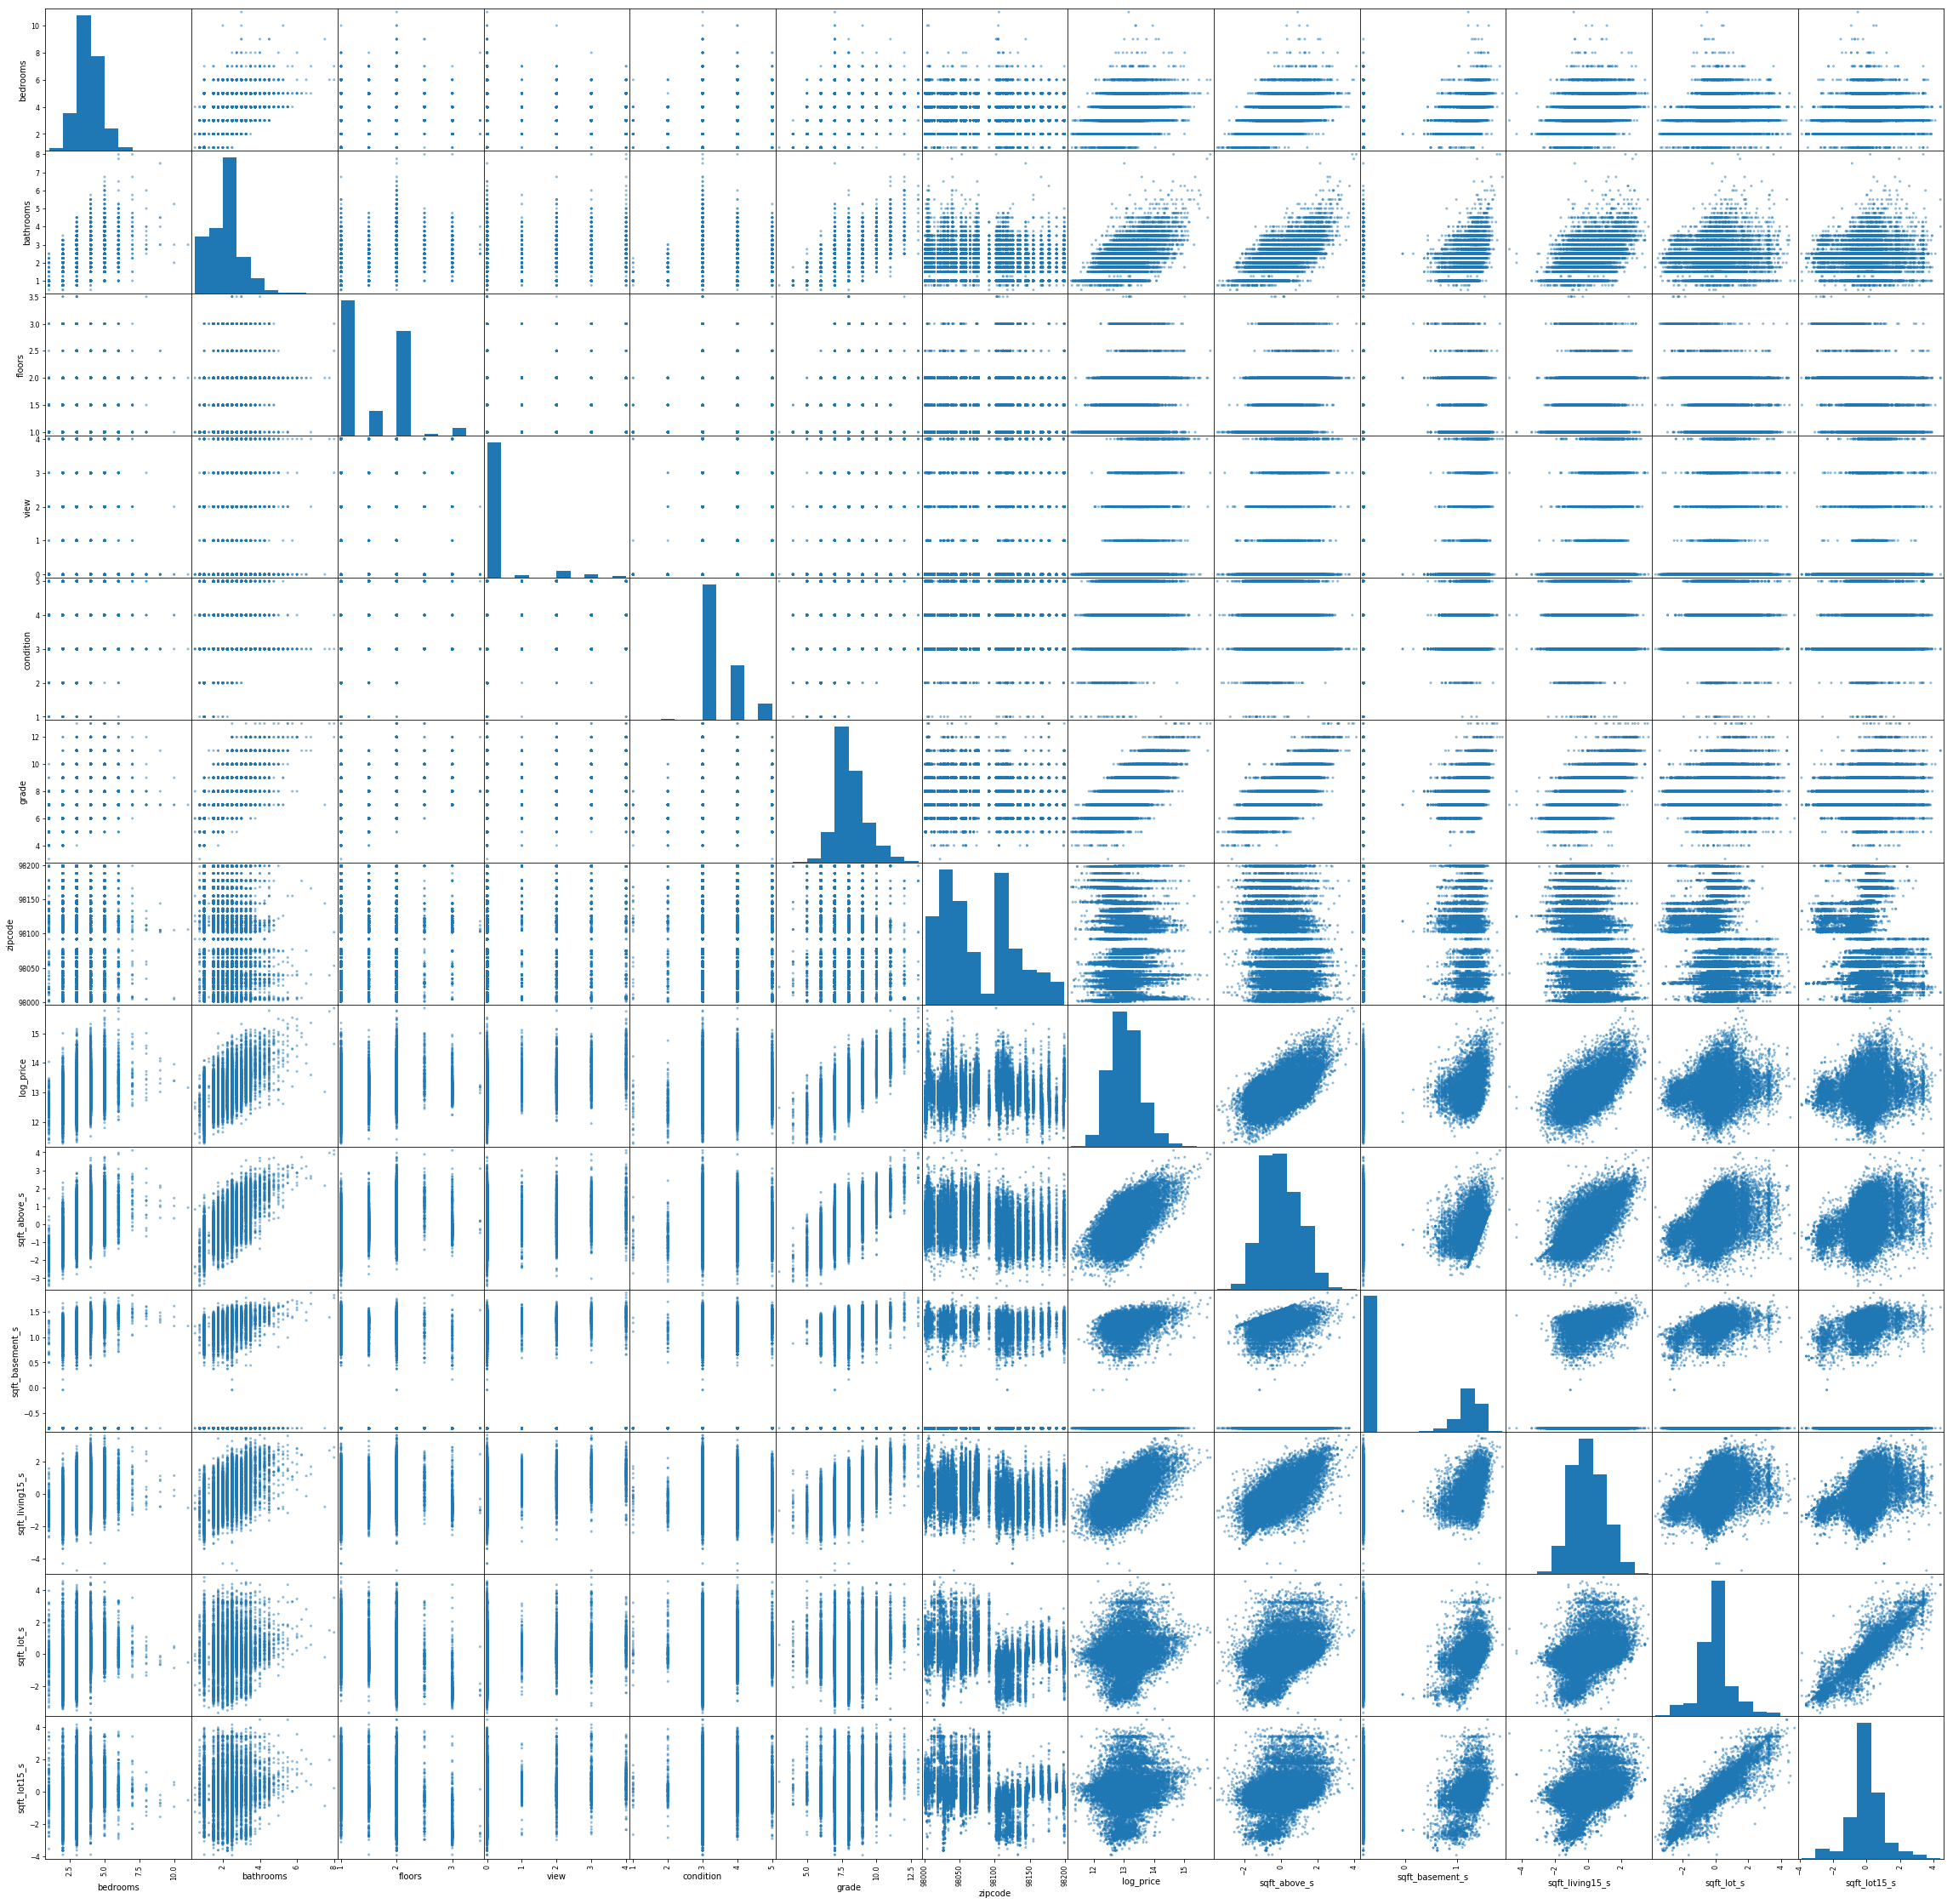

In [113]:
pd.plotting.scatter_matrix(df_clean, figsize=(40,40));

In [126]:
df_raw['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

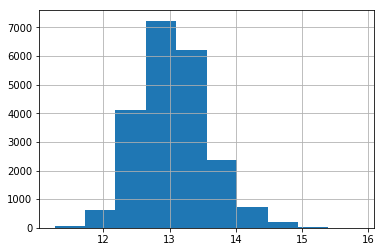

In [120]:
df_clean['log_price'].hist()

In [129]:
df_clean[df_clean['log_price'] < 15].describe()

bedrooms     bathrooms        floors          view     condition  \
count  21565.000000  21565.000000  21565.000000  21565.000000  21565.000000   
mean       3.369951      2.111883      1.493485      0.230049      3.409877   
std        0.902359      0.760900      0.539518      0.757750      0.650617   
min        1.000000      0.500000      1.000000      0.000000      1.000000   
25%        3.000000      1.750000      1.000000      0.000000      3.000000   
50%        3.000000      2.250000      1.500000      0.000000      3.000000   
75%        4.000000      2.500000      2.000000      0.000000      4.000000   
max       11.000000      8.000000      3.500000      4.000000      5.000000   

              grade       zipcode     log_price  sqft_above_s  \
count  21565.000000  21565.000000  21565.000000  21565.000000   
mean       7.652121  98077.999165     13.044980     -0.003834   
std        1.163865     53.506437      0.520137      0.995350   
min        3.000000  98001.000000     11.264464     -3.468754   
25%        7.000000  98033.000000     12.680753     -0.733809   
50%        7.000000  98065.000000     13.017003     -0.099983   
75%        8.000000  98118.000000     13.373044      0.715455   
max       13.000000  98199.000000     14.978661      4.107269   

       sqft_basement_s  sqft_living15_s    sqft_lot_s  sqft_lot15_s  
count     21565.000000     21565.000000  21565.000000  21565.000000  
mean         -0.001634        -0.003083     -0.001653     -0.001616  
std           0.999204         0.997373      0.999642      0.999693  
min          -0.798211        -4.734925     -3.659456     -3.907475  
25%          -0.798211        -0.711407     -0.492841     -0.489291  
50%          -0.798211        -0.067100     -0.010556      0.037013  
75%           1.197886         0.692964      0.366902      0.383179  
max           1.827505         3.647456      4.805835      4.441714

In [104]:
abs(df_clean.corr()) > 0.75

bedrooms  bathrooms  floors   view  condition  grade  \
bedrooms             True      False   False  False      False  False   
bathrooms           False       True   False  False      False  False   
floors              False      False    True  False      False  False   
view                False      False   False   True      False  False   
condition           False      False   False  False       True  False   
grade               False      False   False  False      False   True   
zipcode             False      False   False  False      False  False   
log_price           False      False   False  False      False  False   
sqft_above_s        False      False   False  False      False  False   
sqft_basement_s     False      False   False  False      False  False   
sqft_living15_s     False      False   False  False      False  False   
sqft_lot_s          False      False   False  False      False  False   
sqft_lot15_s        False      False   False  False      False  False   

                 zipcode  log_price  sqft_above_s  sqft_basement_s  \
bedrooms           False      False         False            False   
bathrooms          False      False         False            False   
floors             False      False         False            False   
view               False      False         False            False   
condition          False      False         False            False   
grade              False      False         False            False   
zipcode             True      False         False            False   
log_price          False       True         False            False   
sqft_above_s       False      False          True            False   
sqft_basement_s    False      False         False             True   
sqft_living15_s    False      False         False            False   
sqft_lot_s         False      False         False            False   
sqft_lot15_s       False      False         False            False   

                 sqft_living15_s  sqft_lot_s  sqft_lot15_s  
bedrooms                   False       False         False  
bathrooms                  False       False         False  
floors                     False       False         False  
view                       False       False         False  
condition                  False       False         False  
grade                      False       False         False  
zipcode                    False       False         False  
log_price                  False       False         False  
sqft_above_s               False       False         False  
sqft_basement_s            False       False         False  
sqft_living15_s             True       False         False  
sqft_lot_s                 False        True          True  
sqft_lot15_s               False        True          True